In [2]:
import pandas as pd

NV_df = pd.read_csv('DATA/NVDA.csv')

NV_df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-31,62.924999,63.799999,62.817501,63.047501,62.478188,49386800
1,2018-06-01,63.500000,64.467499,63.412498,64.404999,63.823425,42196800
2,2018-06-04,64.750000,66.434998,64.425003,66.212502,65.614601,64202400
3,2018-06-05,66.245003,66.647499,65.792503,66.267502,65.669098,39171200
4,2018-06-06,65.357498,66.320000,65.192497,66.287498,65.688934,37135600
...,...,...,...,...,...,...,...
1253,2023-05-23,310.000000,312.880005,306.309998,306.880005,306.880005,35625300
1254,2023-05-24,302.100006,306.070007,298.059998,305.380005,305.380005,72141900
1255,2023-05-25,385.230011,394.799988,366.350006,379.799988,379.799988,154391100
1256,2023-05-26,378.899994,391.700012,375.500000,389.459991,389.459991,71342900


In [3]:
NV_df["Direction"] = ['up' if o < c else 'down' for o,c in zip(NV_df["Open"],NV_df["Close"])]

NV_df

,Date,Open,High,Low,Close,Adj Close,Volume,Direction
0,2018-05-31,62.924999,63.799999,62.817501,63.047501,62.478188,49386800,up
1,2018-06-01,63.500000,64.467499,63.412498,64.404999,63.823425,42196800,up
2,2018-06-04,64.750000,66.434998,64.425003,66.212502,65.614601,64202400,up
3,2018-06-05,66.245003,66.647499,65.792503,66.267502,65.669098,39171200,up
4,2018-06-06,65.357498,66.320000,65.192497,66.287498,65.688934,37135600,up
...,...,...,...,...,...,...,...,...
1253,2023-05-23,310.000000,312.880005,306.309998,306.880005,306.880005,35625300,down
1254,2023-05-24,302.100006,306.070007,298.059998,305.380005,305.380005,72141900,up
1255,2023-05-25,385.230011,394.799988,366.350006,379.799988,379.799988,154391100,down
1256,2023-05-26,378.899994,391.700012,375.500000,389.459991,389.459991,71342900,up


In [4]:
from sklearn.model_selection import train_test_split

X = NV_df[["Open","High","Low","Volume"]]
y = NV_df["Direction"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=420)



In [5]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


clf_lin_svc = LinearSVC()
clf_log_reg = LogisticRegression()

clf_lin_svc.fit(X_train,y_train)
clf_log_reg.fit(X_train,y_train)

/home/tim/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression()

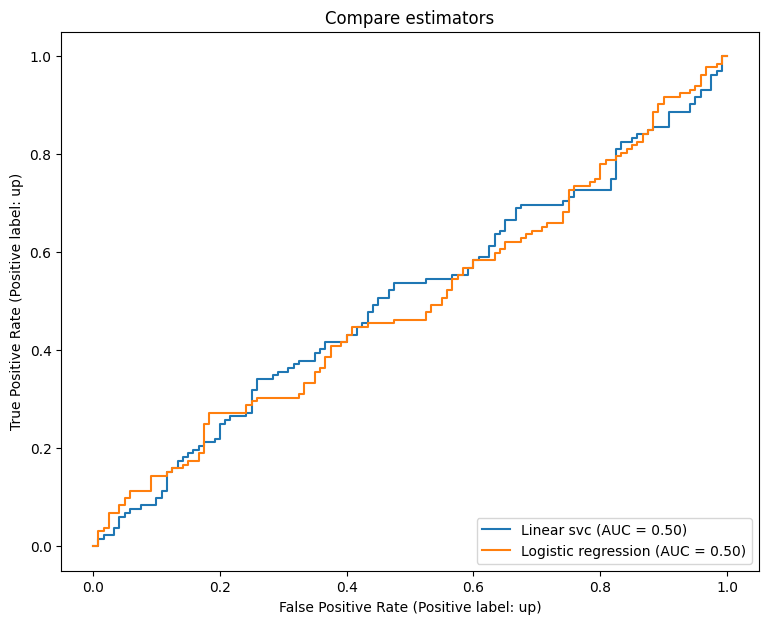

In [6]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,7))
fig1 = RocCurveDisplay.from_estimator(clf_lin_svc,X_test,y_test)
plt.close()
fig2 = RocCurveDisplay.from_estimator(clf_log_reg,X_test,y_test)
plt.close()

fig1.plot(ax=ax, name="Linear svc")
fig2.plot(ax=ax, name="Logistic regression")
ax.set_title("Compare estimators")

plt.show()


In [46]:
# Something for later
#New y
X = NV_df["Date"]
y = NV_df["Close"]

X_train, X_test, y_train, y_test = X[:-255],X[-255:],y[:-255],y[-255:]
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#LSTM neural network
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.1))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adadelta')
lstm_model.fit(X_train, y_train, epochs=15, batch_size=1, verbose=2)



IndexError: tuple index out of range

2023-05-31 13:42:22.674566: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-31 13:42:22.676511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-31 13:42:22.677938: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

8/8 [==============================] - 1s 3ms/step


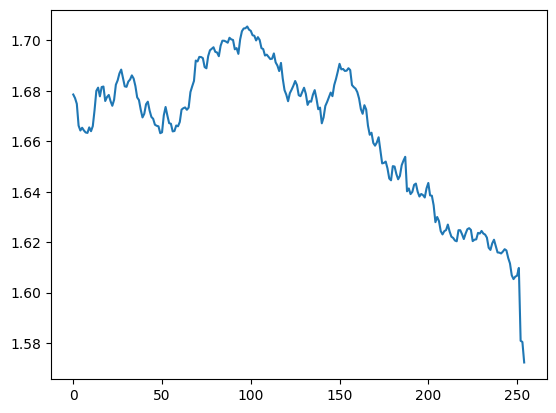

In [45]:
#plt.plot(y_test)
plt.plot(lstm_model.predict(X_test))
